In [1]:
using DrWatson, Revise
@quickactivate "WiFi-Imager"
includet(srcdir("funcs.jl"))
using CairoMakie, Optimization, OptimizationOptimJL, LinearAlgebra, ThreadPinning, JLD2, ProgressMeter, EasyFit

In [2]:
includet(srcdir("makie_theme.jl"))

In [3]:
data_file = datadir("guti","glass-1_tx1_rx1.csv")
empty_mark, csi_data, timestamp, mac_addr = CSV2CSI.read_csv(data_file) # the size of csi_data is (packet,subcarrier)
size(csi_data)

(1391, 128)

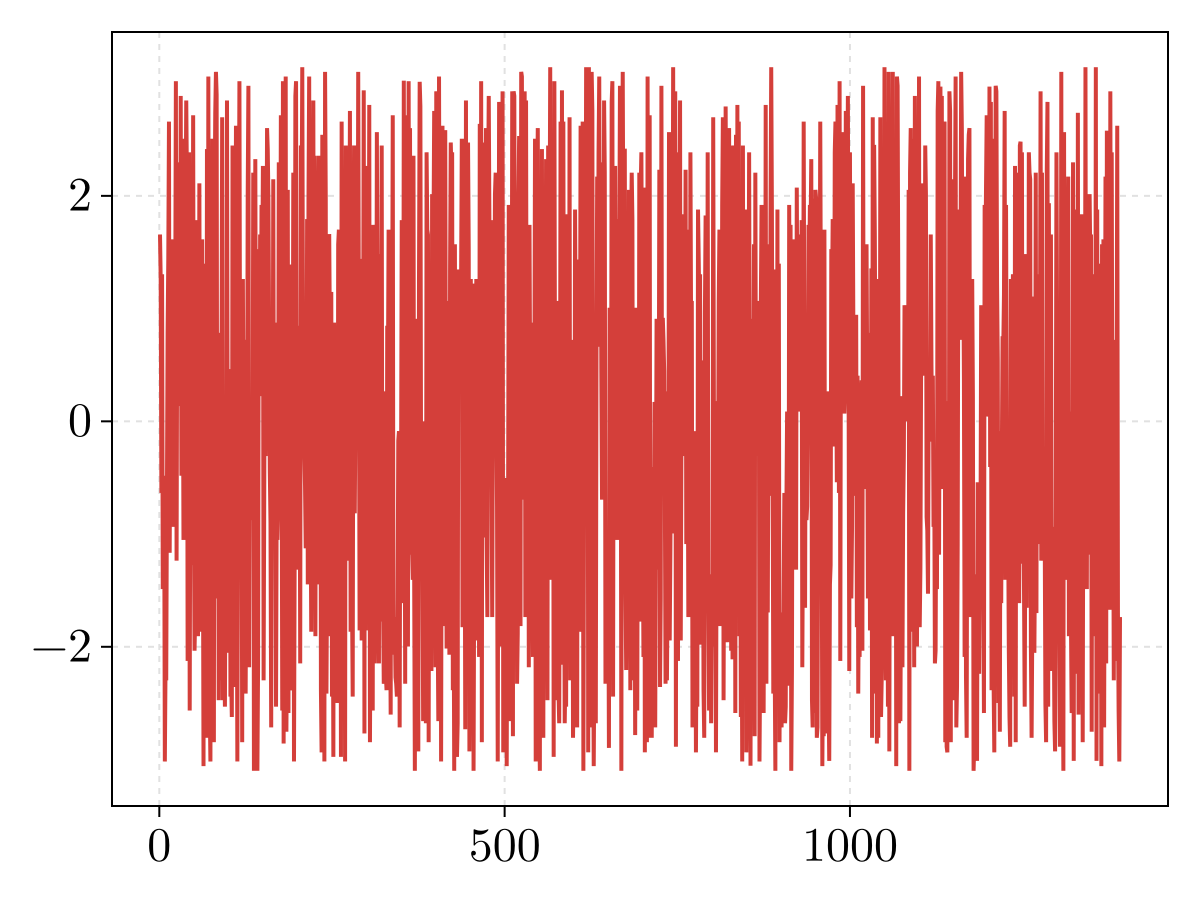

In [4]:
lines(angle.(csi_data[:,18]))

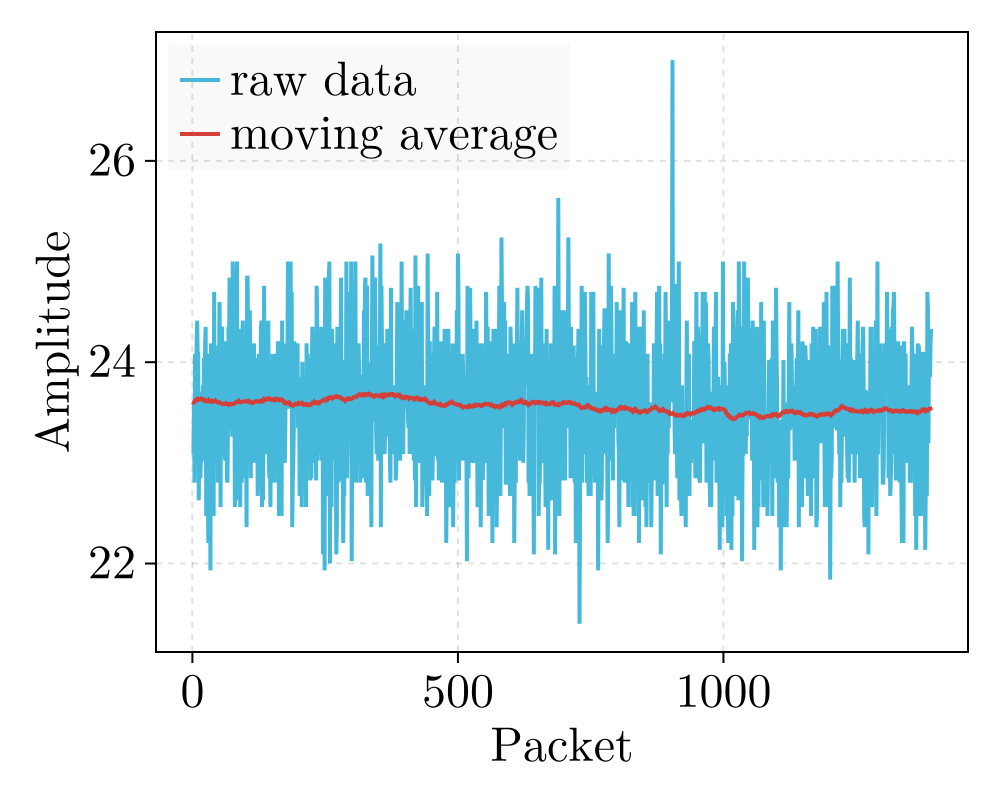

In [41]:
let 
    fig = Figure(; size = (500, 400), rasterize=8)
    ax1 = Axis(fig[1, 1];xlabel="Packet",ylabel="Amplitude")
    lines!(ax1,abs.(csi_data[:,18]),color=my_colors[4],label="raw data")
    lines!(ax1,movavg((abs.(csi_data[:,18])),200).x,label="moving average",color=my_colors[1])
    axislegend(position = :lt,labelsize=24)
    save("/home/sf/paper/WiFimager/figures/abs.pdf",fig)
    fig
end

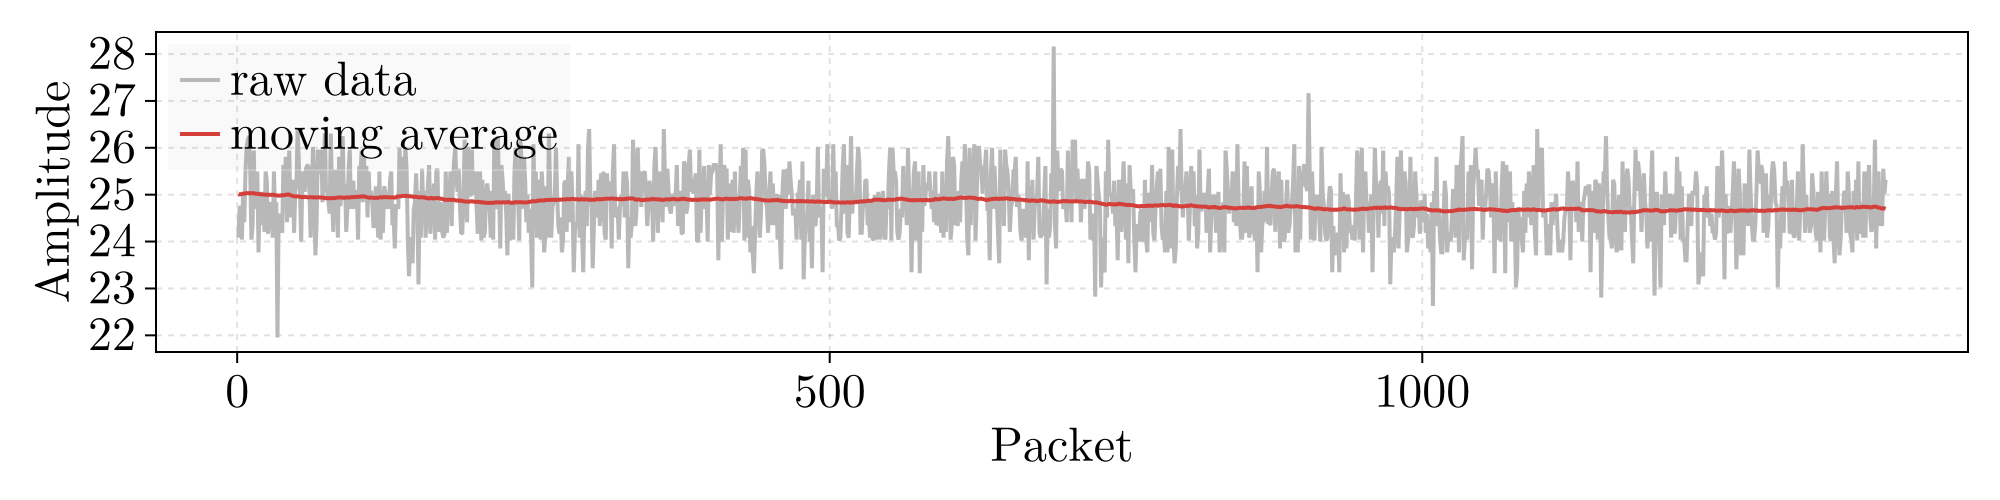

In [14]:
let 
    fig = Figure(; size = (1000, 250))
    ax1 = Axis(fig[1, 1];xlabel="Packet",ylabel="Amplitude")
    lines!(ax1,abs.(csi_data[:,10]),color=my_colors[7],label="raw data")
    lines!(ax1,movavg((abs.(csi_data[:,10])),200).x,label="moving average",color=my_colors[1])
    axislegend(position = :lt,labelsize=24)
    save("/home/sf/paper/IJCAI-Image/figures/abs.pdf",fig)
    fig
end

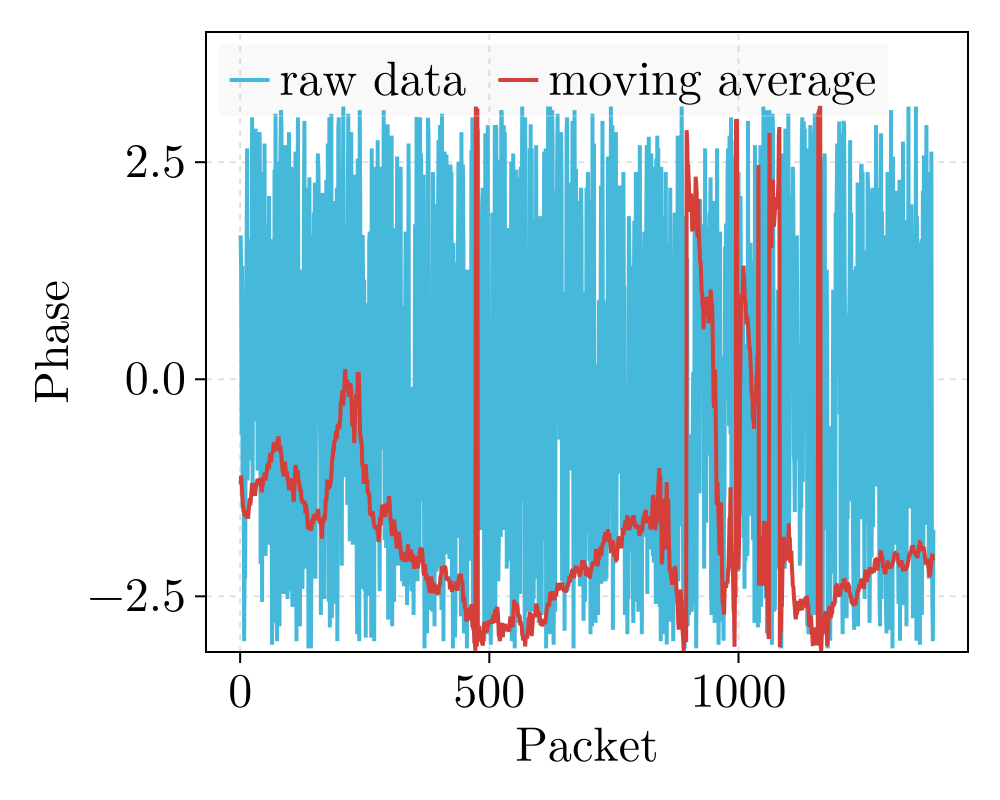

In [ ]:
let 
    fig = Figure(; size = (500, 400), rasterize=8)
    ax1 = Axis(fig[1, 1];xlabel="Packet",ylabel="Phase",)
    lines!(ax1,angle.(csi_data[:,18]),color=my_colors[4],label="raw data")
    sig = complex.(movavg(real.(csi_data[:,18]),200).x,movavg(imag.(csi_data[:,18]),200).x)
    lines!(ax1,angle.(sig),label="moving average")
    
    ylims!(ax1,-π,4)
    axislegend(position = :lt,orientation = :horizontal,labelsize=24)
    save("/home/sf/paper/WiFimager/figures/phase.pdf",fig)
    fig
end

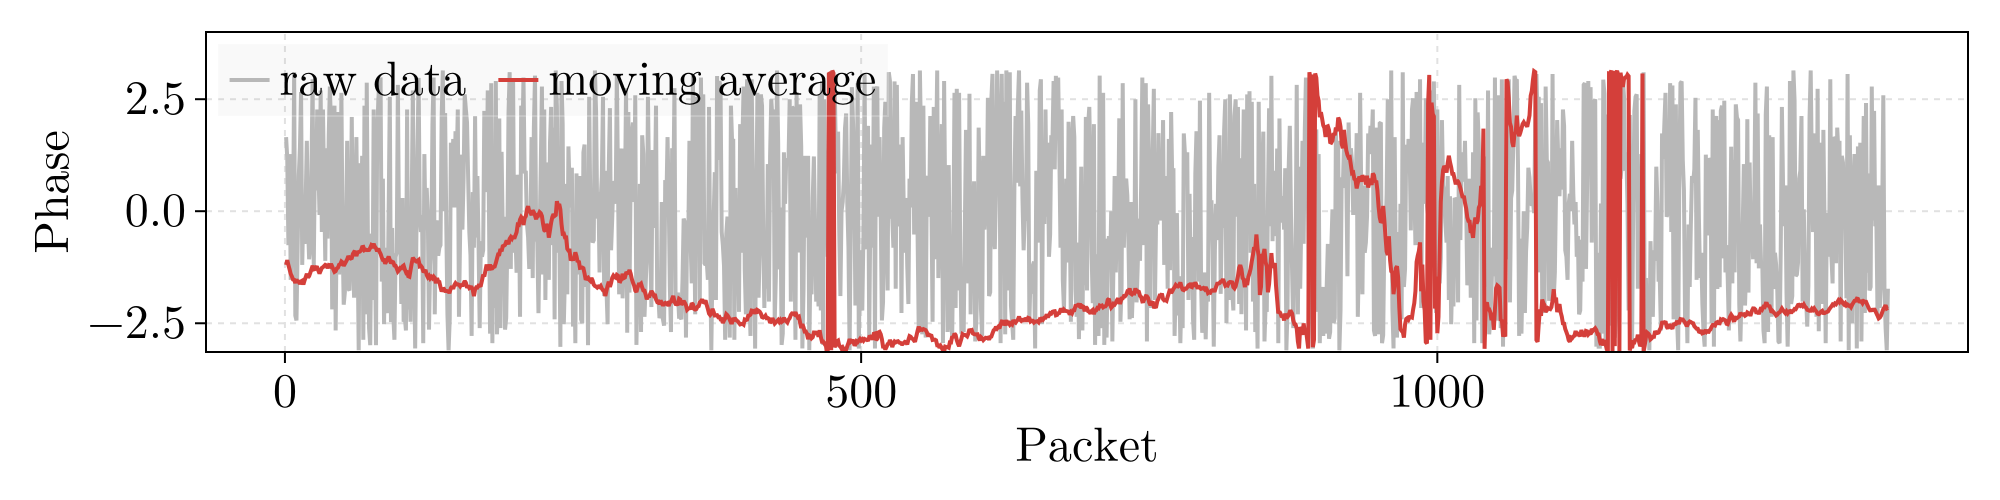

In [13]:
let 
    fig = Figure(; size = (1000, 250), rasterize=8)
    ax1 = Axis(fig[1, 1];xlabel="Packet",ylabel="Phase",)
    lines!(ax1,angle.(csi_data[:,10]),color=my_colors[7],label="raw data")
    sig = complex.(movavg(real.(csi_data[:,10]),200).x,movavg(imag.(csi_data[:,10]),200).x)
    lines!(ax1,angle.(sig),label="moving average")
    
    ylims!(ax1,-π,4)
    axislegend(position = :lt,orientation = :horizontal,labelsize=24)
    save("/home/sf/paper/IJCAI-Image/figures/phase.pdf",fig)
    fig
end

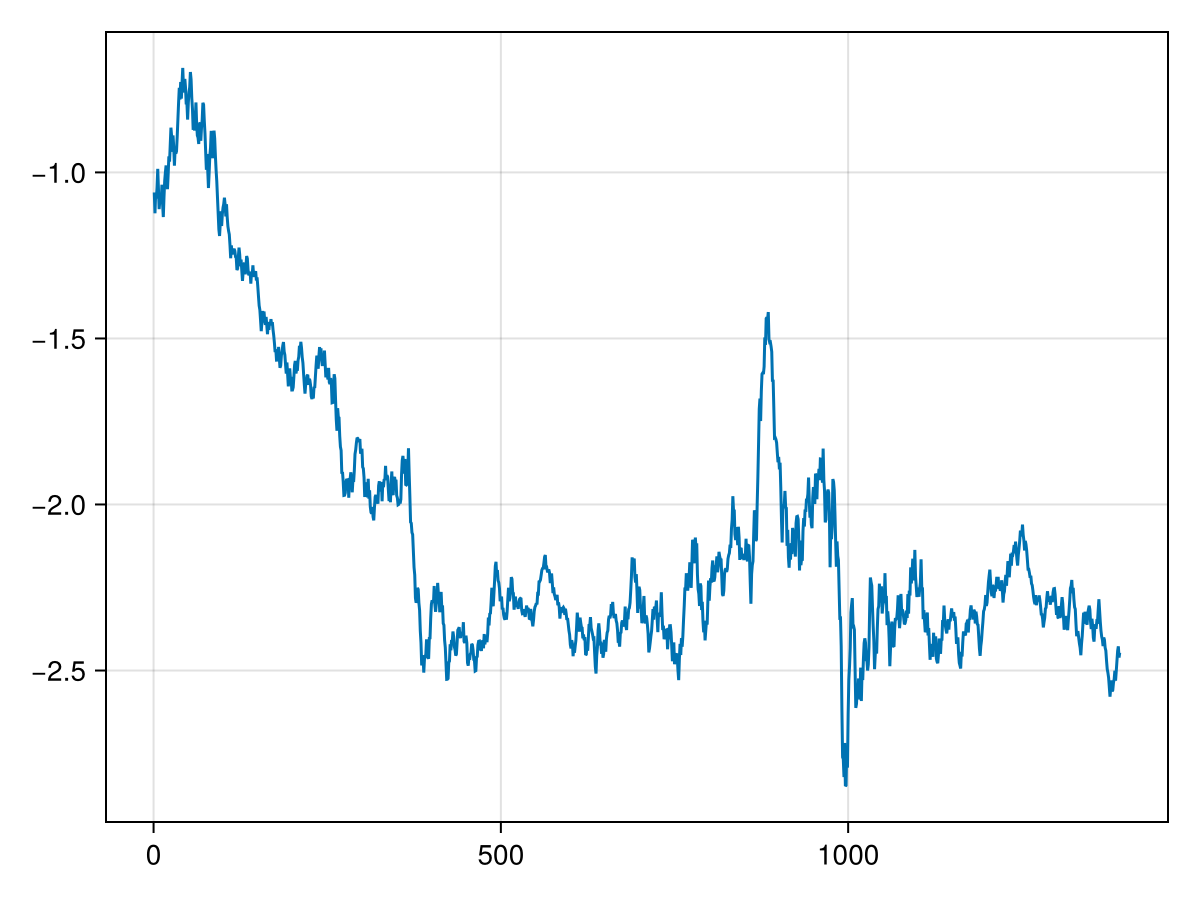

In [13]:
windows_size = 500

sig = complex.(movavg(real.(csi_data[:,18]),windows_size).x,movavg(imag.(csi_data[:,18]),windows_size).x)
lines(angle.(sig))

In [46]:
config_path = projectdir("config", "solid_born.jl")
includet(config_path)
material_names, material_labels, rectangle_pos = read_label_xlsx(datadir("solid_res", "坐标对应.xlsx"), all_materials_labels);


In [58]:
regex = r"(-?\d+)$"
materials = [replace(split(material_names[i],"_")[1],regex=>"") for i in 1:length(material_names)];
length(materials)

197

In [56]:
using StatsBase
freqs = countmap(materials)

# 打印结果
for (val, freq) in freqs
    println("Element $val appears $freq times.")
end

Element leather-leather appears 15 times.
Element glass-wood appears 15 times.
Element leather-leather-leather appears 20 times.
Element glass-leather appears 15 times.
Element rectangle-rectangle-rectangle appears 22 times.
Element glass-glass appears 15 times.
Element rectangle appears 15 times.
Element rectangle-rectangle appears 15 times.
Element glass appears 15 times.
Element leather-wood appears 15 times.
Element leather-wood-glass appears 20 times.
Element leather appears 15 times.
